# 06-3

## PCA 클래스

In [5]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-07-23 13:28:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-23 13:28:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-23 13:28:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [6]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA

# PCA 클래스의 객체 생성 시, n_components 매개변수에 주성분의 개수를 지정해야 함.
pca = PCA(n_components=50)
# 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않음.
pca.fit(fruits_2d)

# 배열 크기 확인
print(pca.components_.shape)

(50, 10000)


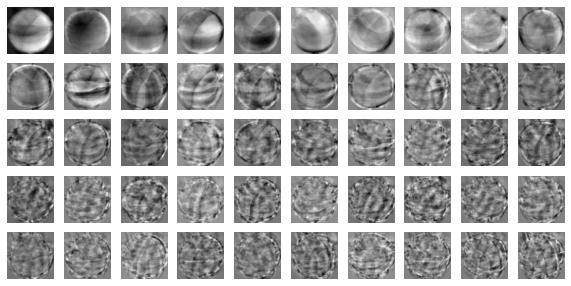

In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n = 샘플 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
          # n 개까지만 그림.
            if i*10 + j < n:    
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.
# 데이터 셋에 있는 어떤 특징을 잡아낸 것.
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
print(fruits_2d.shape)

# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있음.
# transform() : 원본 데이터의 차원을 50으로 줄임.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


## 원본 데이터 재구성

(300, 10000)


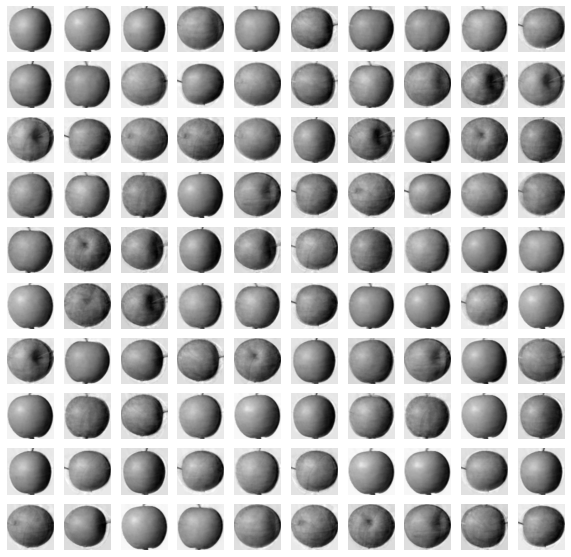

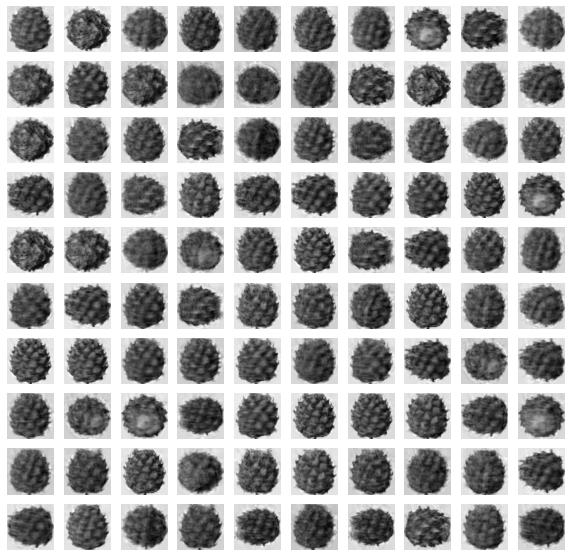

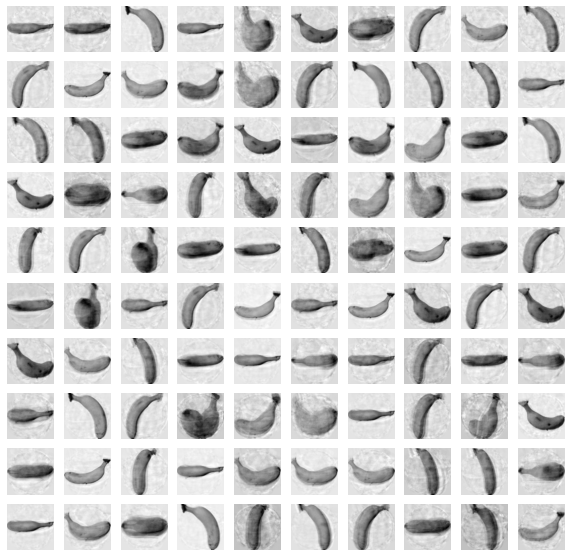

In [10]:
# inverse_transform() : 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

# 데이터를 100x100 크기로 바꾸어 100개씩 나눠 출력
# 순서대로 사과, 파인애플, 바나나 100개씩 담고 있음.
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [11]:
print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산 유지하고 있음.

0.9215671449845251


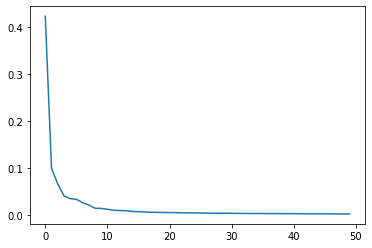

In [12]:
# 설명된 분산 비율을 그래프로 그림
# 적절한 주성분 개수 찾는데 도움될 수 있음.
plt.plot(pca.explained_variance_ratio_)
# 처음 10개의 주성분이 대부분의 분산을 표현하고 있고, 그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작음.

## 다른 알고리즘과 함께 사용하기

In [13]:
# 3개의 과일 사진 분류해야 하므로 로지스틱 회귀 모델 사용.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃값 지정 -  사과 : 0 파인애플 : 1, 바나나 : 2
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

from sklearn.model_selection import cross_validate

# cross_validate() : 교차검증 수행
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
# 점수가 매우 높음 -> 과대적합된 모델을 만들기 쉬움.

# fit_time : 교차 검증 폴드의 훈련 시간 기록
print(np.mean(scores['fit_time']))

# fruits_pca : PCA로 축소.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
# 정확도 100

print(np.mean(scores['fit_time']))
# 훈련시간 20배 이상 감소

# PCA로 훈련 데이터의 차원을 축소하면 저장 공간 뿐 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음.

0.9966666666666667
1.7012277603149415
1.0
0.042344856262207034


In [14]:
# n_components : 주성분의 개수 지정. 또는 원하는 설명된 분산의 비율 입력가능.
#PCA클래스는 지정된 비율에 도달할 때까지 자동으로 주성분 찾음.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)
# 설명된 분산의 50%에 달하는 주성분을 찾기로 설정햇을 때, 2개의 주성분 찾음.

# 원본 데이터 변환.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 주성분 2개 이므로 변환된 데이터 크기 (300, 2)

2
(300, 2)


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
# 2개 특성 사용시 정확도 99%

print(np.mean(scores['fit_time']))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.05149087905883789


In [16]:
# 차원 축소된 데이터 사용해 K-평균 알고리즘으로 클러스터 찾아보기
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


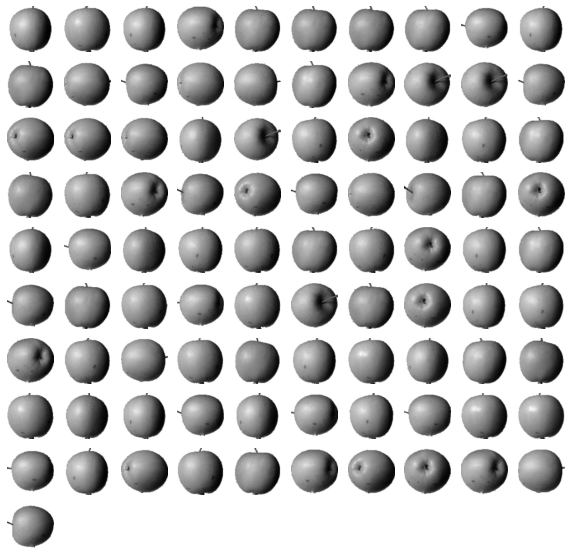

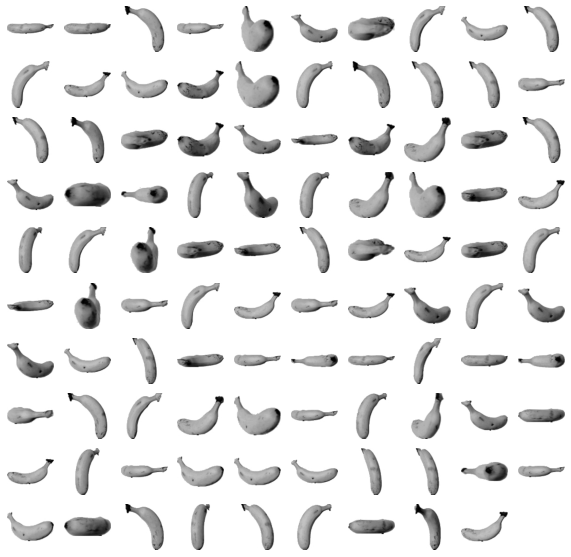

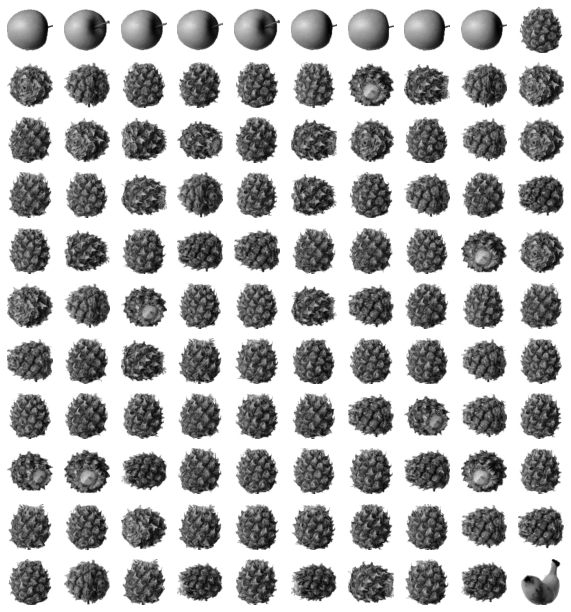

In [17]:
# K-Means가 찾은 레이블 사용해 과일 이미지 출력.
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

# 사과와 파인애플이 혼돈되는 모습 보임.

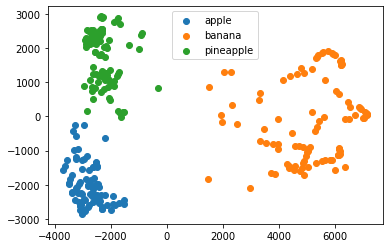

In [18]:
# 훈련 데이터의 차원 줄여 시각화라는 장점 얻음.
# km.labels_ : 클러스터 별로 나누어 산점도 그리기
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 각 클러스터의 산점도가 잘 구분됨.
# 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있기 때문에 혼동 일으키기 쉬움.